In [293]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [294]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import skimage
import skimage.transform as resize
from skimage.io import imread_collection

from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.imagenet_utils import decode_predictions

from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.python.keras.layers import Dense, Dropout, Input
from tensorflow.python.keras.models import Model

In [289]:
test_datagen = ImageDataGenerator()
test = test_datagen.flow_from_directory(directory="the_met_objects/test", target_size=(224,224))


Found 80 images belonging to 16 classes.


---

In [295]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=16, activation="softmax"))

In [314]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [315]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [333]:
train_data_dir = 'the_met_objects/test'
img_height, img_width = 224, 224


train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    subset='validation')

In [318]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(generator=train_generator, validation_data= validation_generator,\
                           epochs=5,callbacks=[checkpoint,early])


Epoch 1/5
3/3 [==============================] - 26s 13s/step - loss: 2.6664 - accuracy: 0.9231 - val_loss: 2.5654 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 24s 7s/step - loss: 2.3466 - accuracy: 0.9385 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 23s 6s/step - loss: 1.7170 - accuracy: 0.9385 - val_loss: 1.0793 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 26s 7s/step - loss: 0.9732 - accuracy: 0.9385 - val_loss: 0.2706 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 25s 12s/step - loss: 0.4356 - accuracy: 0.9385 - val_loss: 4.2912e-04 - val_accuracy: 1.0000


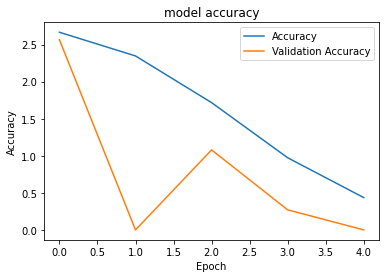

In [323]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["accuracy"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

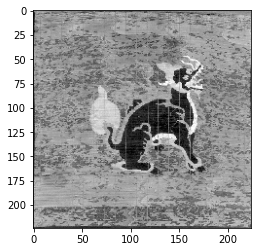

In [332]:
from keras.preprocessing import image
img = image.load_img("60687.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model

output = model.predict(img)
output

In [ ]:
country_list[output.index(1)]

In [330]:
country_list = ['afghanistan',
 'ancient-kingdom-of-kashmir',
 'burma',
 'china',
 'india',
 'indo-portuguese',
 'japan',
 'mysore-or-tamil-nadu',
 'nepal',
 'northwest-china',
 'others',
 'pakistan',
 'south-india',
 'sri-lanka',
 'thailand',
 'tibet']

In [202]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
label_encode2 = LabelEncoder()
y_train_encoded = label_encode.fit_transform(y_train)
y_test_encoded = label_encode2.fit_transform(y_test)


In [204]:
len(X_train), len(y_train)

(250, 250)

In [229]:
len(X_train[0])

1